In [1]:
using Distributions, Plots, JuMP, Gurobi

In [2]:
lambda = 2000
mu = 200

m=rand(Poisson(lambda))
n=rand(Poisson(mu))

x = [rand(Uniform(),2) for i=1:m]
y = [rand(Uniform(),2)  for i=1:n]

192-element Vector{Vector{Float64}}:
 [0.6405683384358888, 0.23882096597710056]
 [0.7124535577821626, 0.29544886219289823]
 [0.7917439053504316, 0.36545514629715914]
 [0.321689965129374, 0.6398274136540719]
 [0.20941065512264456, 0.2211956149507346]
 [0.7087632548904295, 0.2882101040796209]
 [0.4983636915687073, 0.7199250307608557]
 [0.28529402818445215, 0.12223206872055159]
 [0.7308178042004021, 0.4972858574183545]
 [0.052013968281576006, 0.6590075675751182]
 [0.7308524334297147, 0.8751757471925381]
 [0.2736067235159234, 0.6070099026705547]
 [0.594933679307666, 0.13403728708839246]
 ⋮
 [0.8854148272774308, 0.31406176070576386]
 [0.2865902502774986, 0.5869291265774933]
 [0.5385693548095797, 0.45893234484006984]
 [0.7154751816443721, 0.3665263383513898]
 [0.29838461184046405, 0.2906703175704156]
 [0.8375957622429661, 0.9639849092241003]
 [0.10220903608206933, 0.10284062651674686]
 [0.02221847718397596, 0.3424915955516734]
 [0.2745012655132678, 0.8376005222591177]
 [0.575295595635023, 0.

In [3]:
d(x,y) = sqrt(sum((x-y).^2))

d (generic function with 1 method)

In [4]:
W = [d(x[i],y[j]) for i=1:m,j=1:n]

1981×192 Matrix{Float64}:
 0.11866    0.207936    0.313283  0.557958  …  0.302622   0.961984   0.201473
 0.194017   0.204923    0.256088  0.320489     0.054512   0.728858   0.104132
 0.912351   0.923782    0.94216   0.402951     0.722717   0.0668128  0.745906
 0.15351    0.087031    0.1043    0.604152     0.283949   1.00689    0.319937
 0.237446   0.306903    0.400929  0.705063     0.444536   1.10717    0.348549
 0.573859   0.639568    0.718973  0.39815   …  0.51476    0.63224    0.404198
 0.19268    0.203637    0.255072  0.321839     0.0547017  0.730209   0.103811
 0.733672   0.705522    0.680998  0.319133     0.518277   0.360011   0.623662
 0.0981595  0.00801703  0.099629  0.526628     0.207497   0.931341   0.24376
 0.216946   0.145303    0.115355  0.649734     0.330191   1.04772    0.380845
 0.369527   0.456033    0.556461  0.510215  …  0.425658   0.858192   0.268079
 0.422268   0.370098    0.326015  0.332843     0.230564   0.657978   0.384312
 0.473037   0.450595    0.441232  0.174

In [5]:
model = Model(Gurobi.Optimizer)

@variable(model, pi[1:m,1:n]>=0)
@constraint(model,sum(pi,dims=2).==1)

@objective(model,Min, sum(W.*pi))

optimize!(model)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-17
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1981 rows, 380352 columns and 380352 nonzeros
Model fingerprint: 0x9ae709cc
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-04, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 1981 rows and 380352 columns
Presolve time: 0.33s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.0201651e+01   0.000000e+00   0.000000e+00      0s

Solved with dual simplex
Solved in 0 iterations and 0.40 seconds (0.15 work units)
Optimal objective  7.020165125e+01

User-callback calls 45, time in user-callback 0.01 sec


In [6]:
vpi = value.(pi)

asignacion = [findmax(vpi[i,:])[2] for i=1:m]

1981-element Vector{Int64}:
  13
 101
  58
  98
  27
  16
 101
  49
   2
  19
   8
  51
   7
   ⋮
  36
 105
 190
 167
 155
 114
 140
 131
  55
  30
  55
  13

In [16]:
function plotear(x,y,asignacion)
    
    p=plot()
    
    scatter!([u[1] for u in x], [u[2] for u in x], color=:blue, markeralpha=0.2 , label=:none)
    scatter!([u[1] for u in y], [u[2] for u in y], color=:red, markeralpha=0.5, label=:none)
    
    for i=1:length(x)
        plot!( [x[i][1], y[asignacion[i]][1] ] , [x[i][2], y[asignacion[i]][2] ], label=:none, color=:teal, lw=1, size=(1000,1000))
    end
    p
end
        

plotear (generic function with 1 method)

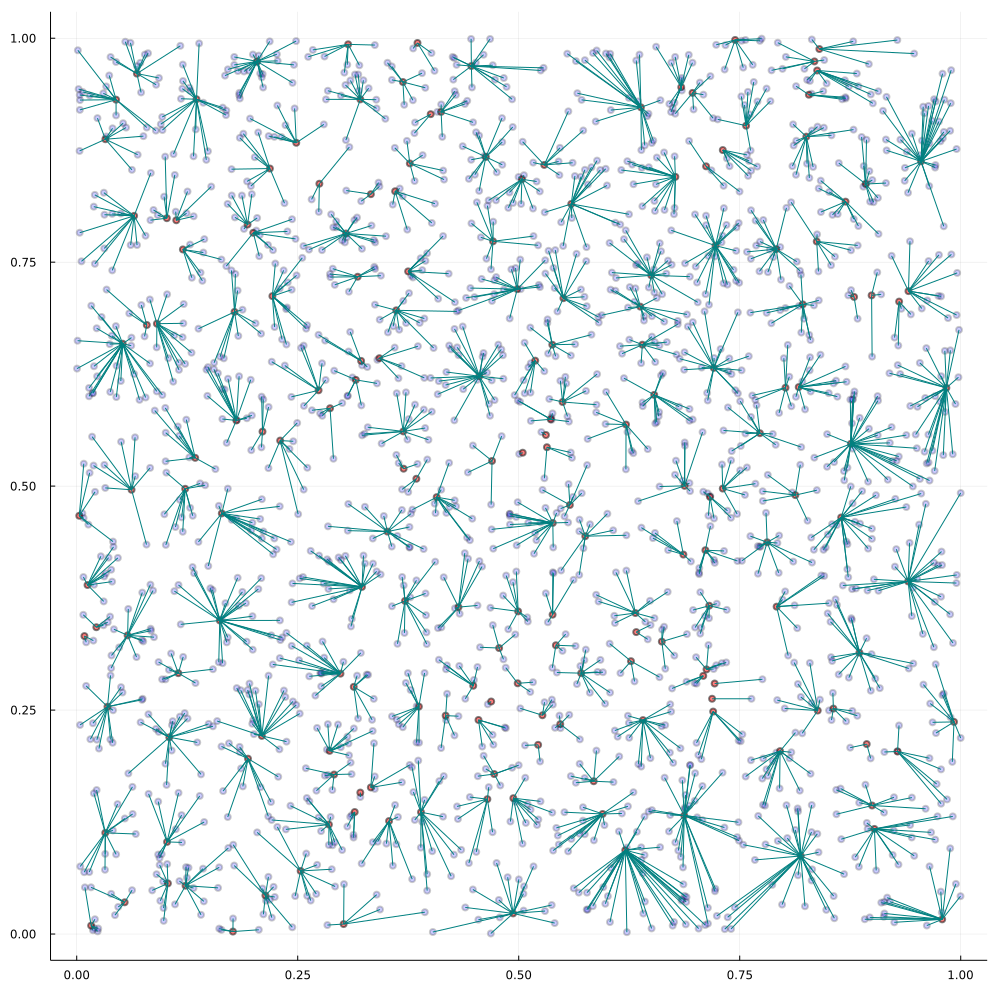

In [17]:
plotear(x,y,asignacion)

In [18]:
N = [sum(asignacion.==j) for j=1:n];

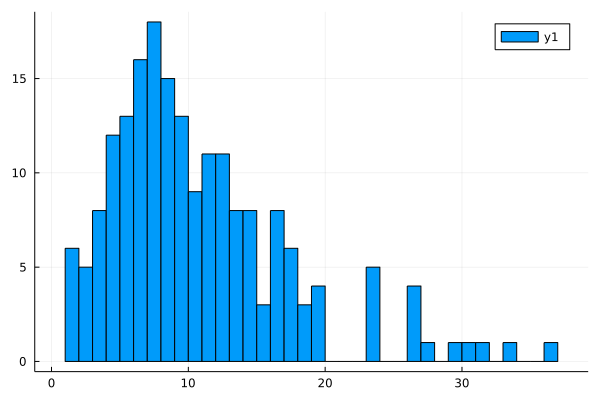

In [19]:
using StatsBase
h = fit(Histogram, N, nbins=maximum(N))

plot(h)

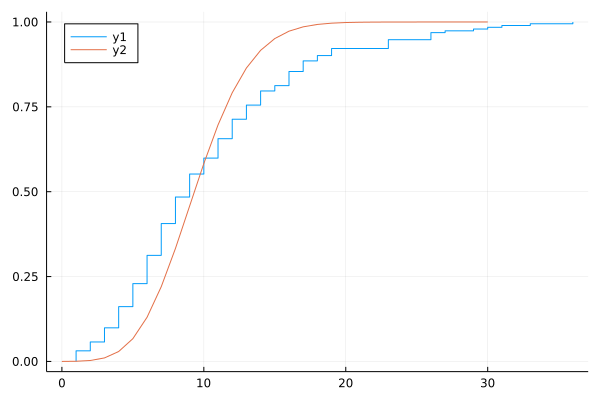

In [20]:
plot(ecdf(N))
plot!((0:30), cdf.(Poisson(lambda/mu),0:30))